# Adaptive Resonance Theory Neural Networks
Adaptive resonance theory is a type of neural network technique developed by Stephen Grossberg and Gail Carpenter in 1987. It is based on competition and uses unsupervised learning model. Adaptive Resonance Theory ART networks, as the name suggests, is always open to new learning adaptive without losing the old patterns resonance. Basically, ART network is a vector classifier which accepts an input vector and classifies it into one of the categories depending upon which of the stored pattern it resembles the most.

### ART1 
It is the simplest and the basic ART architecture and is capable of clustering binary input values.
In this example:
 * We'll use 10x10 ASCII blocks to demonstrate the ART1 functionality.

In [1]:
# Importing the necessary libraries
import numpy as np

### Information about the Dataset
For the dataset we are using 10x10 ASCII blocks. Since ART1 is only capable fo the clustering binary input values. 

In [2]:
data = np.array(["   O ",
        "  O O",
        "    O",
        "  O O",
        "    O",
        "  O O",
        "    O",
        " OO O",
        " OO  ",
        " OO O",
        " OO  ",
        "OOO  ",
        "OO   ",
        "O    ",
        "OO   ",
        "OOO  ",
        "OOOO ",
        "OOOOO",
        "O    ",
        " O   ",
        "  O  ",
        "   O ",
        "    O",
        "  O O",
        " OO O",
        " OO  ",
        "OOO  ",
        "OO   ",
        "OOOO ",
        "OOOOO"])
data

array(['   O ', '  O O', '    O', '  O O', '    O', '  O O', '    O',
       ' OO O', ' OO  ', ' OO O', ' OO  ', 'OOO  ', 'OO   ', 'O    ',
       'OO   ', 'OOO  ', 'OOOO ', 'OOOOO', 'O    ', ' O   ', '  O  ',
       '   O ', '    O', '  O O', ' OO O', ' OO  ', 'OOO  ', 'OO   ',
       'OOOO ', 'OOOOO'], dtype='<U5')

### Initializing the learning rate, the vigilance parameter, and the weights
Following parameters are used -

* n − Number of components in the input vector
* m − Maximum number of clusters that can be formed
* bij − Weight from F1b to F2 layer, i.e. bottom-up weights
* tji − Weight from F2 to F1b layer, i.e. top-down weights
* ρ − Vigilance parameter
* ||x|| − Norm of vector x

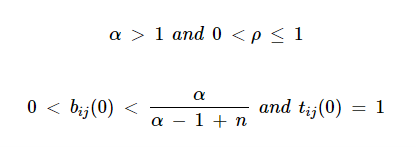

In [11]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/Apoorv-17/winter-of-contributing/Datascience_With_Python/Datascience_With_Python/Machine%20Learning/Algorithms/Adaptive%20Resonance%20Theory/Images/Algo1.png")

In [3]:
## Simplied ART1

class ART1:
    """
    ART class
    Usage example:
    --------------
    # Create a ART network with input of size 5 and 20 internal units
    >>> network = ART(5,10,0.5)
    """

    def __init__(self, n=5, m=10, rho=.5):
        '''
        Create network with specified shape
        
        For Input array I of size n, we need n input nodes in F1. 
        
        
        Parameters:
        -----------
        n : int
            feature dimension of input; number of nodes in F1
        m : int
            Number of neurons in F2 competition layer
            max number of categories
            compare to n_class
        rho : float
            Vigilance parameter
            larger rho: less inclusive prototypes
            smaller rho: more generalization
        
        internal paramters
        ---------- 
        F1: array of size (n)
            array of F1 neurons
        F2: array of size (m)
            array of F2 neurons
        Wf: array of shape (m x n)
            Feed-Forward weights
            These are Tk
        Wb: array of shape (n x m)
            Feed-back weights
        n_cats : int
            Number of F2 neurons that are active
            (at any given time, number of category templates)
        
        '''
        # Comparison layer
        self.F1 = np.ones(n)
        
        # Recognition layer
        self.F2 = np.ones(m)
        
        # Feed-forward weights
        self.Wf = np.random.random((m,n))
        
        # Feed-back weights
        self.Wb = np.random.random((n,m))
        
        # Vigilance parameter
        self.rho = rho
        
        # Number of active units in F2
        self.n_cats = 0

    def reset(self):
        """Reset whole network to start conditions
        """
        self.F1 = np.ones(n)
        self.F2 = np.ones(m)
        self.Wf = np.random.random((m,n))
        self.Wb = np.random.random((n,m))
        self.n_cats = 0 
        
    def learn(self, X):
        """Learn X
        use i as index over inputs or F1
        use k as index over categories or F2
        """ 

        # Compute F2 output using feed forward weights
        self.F2[...] = np.dot(self.Wf, X)
        
        # collect and sort the output of each active node (C)
        C = np.argsort(self.F2[:self.n_cats].ravel())[::-1]

        for k in C:
            # compute nearest memory
            d = (self.Wb[:,k]*X).sum()/X.sum()

            # Check if d is above the vigilance level
            if d >= self.rho:
                ww = self._learn_data(k, X)
                return ww
            else: 
                pass

        # No match found within vigilance level
        # If there's room, increase the number of active units
        # and make the newly active unit to learn data
        if self.n_cats < self.F2.size:
            k = self.n_cats  # index of last category
            ww = self._learn_data(k, X)
            self.n_cats += 1
            return ww
        else: 
            return None,None

    def _learn_data(self, node, dat):
        """
        node : i : F2 node
        dat  : X : input data
        """ 
        self._validate_data(dat)
        
        # Learn data
        self.Wb[:,node] *= dat
        self.Wf[node,:] = self.Wb[:,node]/(0.5+self.Wb[:,node].sum())
        return self.Wb[:,node], node
    
    def predict(self, X):
        C = np.dot(self.Wf[:self.n_cats], X)

        #return active F2 node, unless none are active
        if np.all(C == 0):
            return None

        return np.argmax(C)

    def _validate_data(self, dat):
        """
        dat is a single input record
        Checks: data must be 1s and 0s
        """
        pass_checks = True
        
        # Dimensions must match
        if dat.shape[0] != len(self.F1):
            pass_checks = False
            msg = "Input dimensins mismatch."
        
        # Data must be 1s or 0s
        if not np.all((dat == 1) | (dat == 0)):
            pass_checks = False
            msg = "Input must be binary."
        
        if pass_checks:
            return True
        else: 
            raise Exception("Data does not validate: {}".format(msg))


### Cleaning and Preprocessing
* Set activations of all F1 a and F1 units.
* Input signal from F1a to F1b layer must be sent to get unique characters from the helper function
* For every inhibited F2 node return the reverse order of the first 2 unique characters from the the helper funtion

In [4]:
"""
Helper function
"""

from collections import Counter

def preprocess_data(data): 
    """
    Convert to numpy array
    Convert to 1s and 0s
    
    """
    # Look at first row
    if data[0]: 
        irow = data[0]

        # get size
        idat_size = len(irow)

        # get unique characters
        chars = False
        while not chars: 
            chars = get_unique_chars(irow, reverse=True)
        char1, char2 = chars

    outdata = []
    idat = np.zeros(idat_size, dtype=bool)

    for irow in data:
        idat = [x==char1 for x in irow]
        outdata.append(idat)
    
    return np.array(outdata).astype(int)

def get_unique_chars(irow, reverse=False):
    """
    Get unique characters in data
    Helper function
    ---- 
    reverse:   bool
        Reverses order of the two chars returned
    """
    chars = Counter(irow)
    if len(chars) > 2: 
        raise Exception("Data is not binary")
    elif len(chars) < 2: 
        # first row doesn't contain both chars
        return False, False

    # Reorder here?
    if reverse: 
        char2, char1 = chars.keys()
    else: 
        char1, char2 = chars.keys()
    
    return char1, char2


### DO

In [5]:
network = ART1(n=5, m=7, rho=0.5)

# preprocess data
data_cleaned = preprocess_data(data)

# learn data array, row by row
for row in data_cleaned:
    network.learn(row)

print ("n categories: ", network.n_cats)
#print tt

n categories:  7


### Predictions

Let's see the clusters created through training: 

In [6]:
network.n_cats

7

In [7]:
from collections import defaultdict

# Printing the clusters obtained thorugh the training
output_dict = defaultdict(list)

for row, row_cleaned in zip (data, data_cleaned): 
    pred = network.predict(row_cleaned)
    output_dict[pred].append(row)

for k,v in output_dict.items():
    print (k)
    print ('-----')
    for row in v: 
        print (row)
    print 
    

0
-----
   O 
   O 
6
-----
  O O
  O O
  O O
 OO O
 OO  
 OO O
 OO  
OOO  
OOO  
OOOO 
OOOOO
  O  
  O O
 OO O
 OO  
OOO  
OOOO 
OOOOO
3
-----
    O
    O
    O
    O
5
-----
OO   
OO   
 O   
OO   
None
-----
O    
O    


### Look at the weights as patterns
Weight updating for node J can be done as follows −

In [8]:
cluster_units = network.Wf[:network.n_cats]
for idx, CU_weights in enumerate(cluster_units):
    pattern = CU_weights
    pattern = pattern.astype(bool)
    
    print ("Pattern #{}".format(idx))
    print (pattern.astype(int))

Pattern #0
[0 0 0 1 0]
Pattern #1
[0 0 1 0 1]
Pattern #2
[0 0 0 0 1]
Pattern #3
[0 0 0 0 1]
Pattern #4
[0 0 1 0 1]
Pattern #5
[0 1 1 0 1]
Pattern #6
[0 0 1 0 0]


The stopping condition for the ART algorithm must be checked and it may be as follows −

* Do not have any change in weight.
* Reset is not performed for units.
* Maximum number of epochs reached.